# Project Introduction

This project involves the analysis of a dataset containing information on Olympic medal counts and economic data for various countries. The dataset includes columns for country names, country codes, the number of gold, silver, and bronze medals won, the total medal count, each country's GDP (in billions), and population data for the year 2023. The goal of this analysis is to explore patterns and relationships between Olympic success and economic factors such as GDP and population. This analysis could reveal insights into how a country's economic conditions influence its performance in the Olympic Games.

# Steps for performing Analysis
- ### 1. Importing libraries
- ### 2. Loading the Dataset
- ### 3. Exploring the Dataset
- ### 4. Checking for Missing Values, Data Cleaning and Preprocessing
- ### 5. Exploratory Data Analysis (EDA)

## Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
data = pd.read_csv('olympics-economics.csv')

## Exploring the Dataset

In [4]:
data.head()

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.19,2023,334.9
1,China,CHN,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6
4,France,FRA,16,26,22,64,44460.82,2023,68.2


This shows the first 5 rows of the dataset. It includes information about different countries and their Olympic medal counts (gold, silver, bronze, total), their GDP (in billions), the GDP year (2023), and the population size in millions. The United States, China, Japan, Australia, and France are the first five countries listed.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


The dataset contains 206 rows and 9 columns. The columns include both categorical (country, country_code) and numerical data (gold, silver, bronze, total, gdp, gdp_year, population). No missing values are present as all columns have 206 non-null entries. The numerical data types are appropriately represented as integers and floats. The dataset is quite small in size (14.6 KB), making it easy to work with for analysis.

In [6]:
data.describe()

,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


The summary statistics provide insights into the distribution of Olympic medal counts, GDP, and population across the countries:

- The average number of gold medals won is 10.39, while the maximum is 40.
- The total medal count ranges from 0 to 126, with an average of 28.4.
- GDP values have a large spread, ranging from $486.7 billion  to  $81.7 trillion, with a mean of $22.3 trillion.
- Population values also vary widely, from 0.3 million to over 1.4 billion, with a mean of 82.1 million.

This statistical summary highlights significant variation in both Olympic performance and economic factors across countries.

In [7]:
data.shape

(90, 9)

The output (90, 9) indicates that the dataset contains 90 rows and 9 columns.

- Rows (90): Each row represents a country, and for each country, we have various attributes such as the number of medals won, GDP, population, etc.
- Columns (9): The dataset includes 9 different variables or features. These variables provide information like the country name, country code, the number of gold, silver, and bronze medals, total medals, GDP, year of GDP data, and population.

## Checking for Missing Values, Data Cleaning and Preprocessing

In [8]:
data.isnull().sum()

country         0
country_code    0
gold            0
silver          0
bronze          0
total           0
gdp             0
gdp_year        0
population      0
dtype: int64

The output shows that all columns have 0 missing values. This means the dataset is complete, and no further preprocessing is needed to handle missing data. Since there are no null entries, the dataset is already clean in this aspect, allowing us to proceed directly with further analysis steps like exploration and visualization without worrying about data imputation or omission.



## Exploratory Data Analysis (EDA)

### Which country has won the most Olympic medals overall?

In [9]:
most_medals_country = data.loc[data['total'].idxmax()]
most_medals_country[['country', 'total']]

country    United States
total                126
Name: 0, dtype: object

### From this we can say that United States has won the most Olympic medals overall i.e. 128

## Is there a correlation between a country's GDP and its total Olympic medal count?

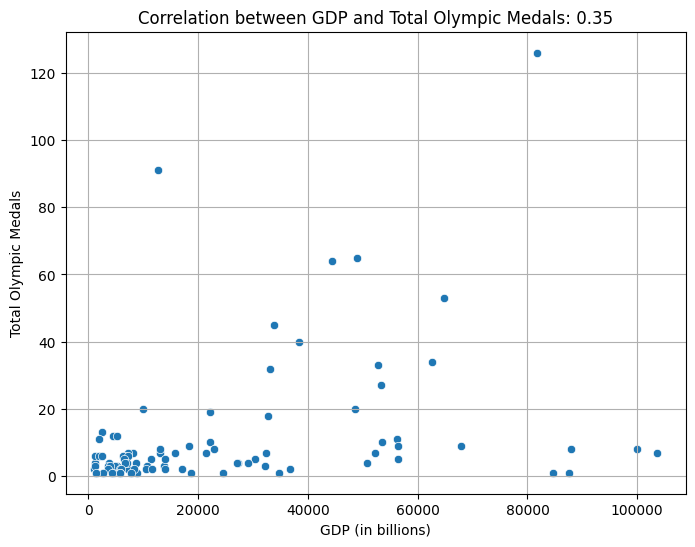

0.34794157444147733

In [10]:
# Calculate the correlation between GDP and total medals
correlation = data['gdp'].corr(data['total'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['gdp'], y=data['total'])
plt.title(f'Correlation between GDP and Total Olympic Medals: {correlation:.2f}')
plt.xlabel('GDP (in billions)')
plt.ylabel('Total Olympic Medals')
plt.grid(True)
plt.show()

correlation


To explore the relationship between a country's economic power (measured by GDP) and its Olympic success (measured by total medal count), we performed a correlation analysis. The calculated Pearson correlation coefficient between GDP and total medals is 0.35, indicating a moderate positive correlation.

This suggests that countries with higher GDPs tend to win more medals, but the relationship is not very strong. Economic power may play a role in Olympic performance, but other factors like sports infrastructure, government support, and cultural emphasis on sports also influence a country's success.

The scatter plot above visualizes this relationship, showing that while wealthier countries generally perform better, there is still considerable variation among nations with similar GDP levels. This indicates that GDP is not the sole predictor of Olympic success.



## Which country has the highest medals-to-population ratio (medals per capita)?

In [17]:
# Calculate the medals-to-population ratio for each country
data['medals_per_capita'] = data['total'] / data['population']

# Find the country with the highest medals-to-population ratio
highest_medals_per_capita = data.loc[data['medals_per_capita'].idxmax()]

highest_medals_per_capita[['country', 'medals_per_capita']]

country              Grenada
medals_per_capita       20.0
Name: 80, dtype: object

The country with the highest medals-to-population ratio (medals per capita) is Grenada, with a ratio of 20 medals per million people.

## What is the relationship between GDP per capita and the number of gold medals won?

In [18]:
# Calculate GDP per capita for each country
data['gdp_per_capita'] = data['gdp'] * 1e9 / data['population'] * 1e6

# correlation between GDP per capita and gold medals
correlation = data['gdp_per_capita'].corr(data['gold'])

correlation


-0.12466516990423268

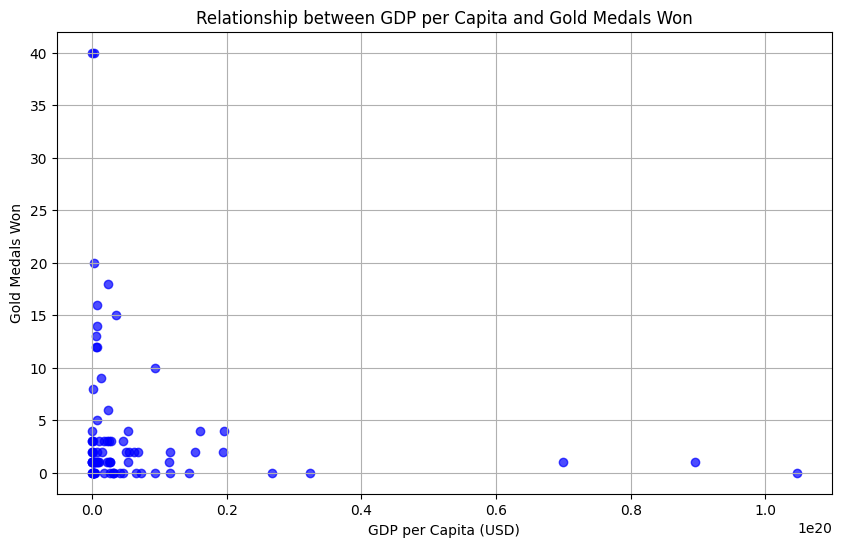

In [19]:
# Plotting GDP per capita vs. gold medals
plt.figure(figsize=(10, 6))
plt.scatter(data['gdp_per_capita'], data['gold'], color='blue', alpha=0.7)
plt.title('Relationship between GDP per Capita and Gold Medals Won')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Gold Medals Won')

# Show the plot
plt.grid(True)
plt.show()


This will give you a visual representation of the relationship between GDP per capita and gold medals.


The correlation between GDP per capita and the number of gold medals is approximately -0.125. This indicates a weak negative relationship, meaning that countries with a higher GDP per capita do not necessarily win more gold medals, and in some cases, they might win slightly fewer.


## Are wealthier countries more likely to win more gold medals than others?

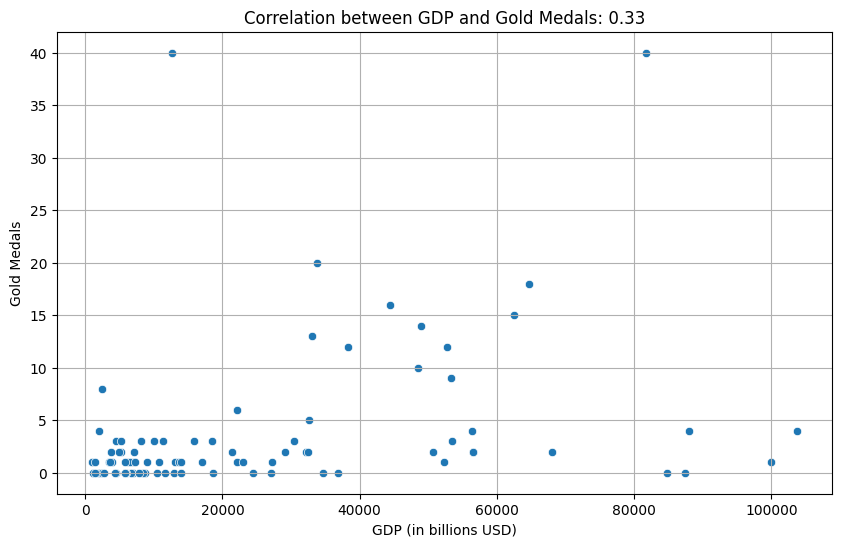

0.33139165670488496

In [20]:
# Calculate the correlation between GDP and gold medals
gdp_gold_corr = data['gdp'].corr(data['gold'])

# Plot the relationship between GDP and gold medals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='gold', data=data)
plt.title(f"Correlation between GDP and Gold Medals: {gdp_gold_corr:.2f}")
plt.xlabel("GDP (in billions USD)")
plt.ylabel("Gold Medals")
plt.grid(True)
plt.show()

gdp_gold_corr


### Analysis: Relationship Between GDP and Gold Medals

We analyzed whether wealthier countries are more likely to win more gold medals by calculating the correlation between GDP (Gross Domestic Product) and the number of gold medals won by each country.

#### Findi
ounts.
- **Scatter Plot**: The scatter plot illustrates the relationship between a country's GDP (in billions of USD) and its gold medal count. Each point represents a country, with GDP on the x-axis and the number of gold medals on the y-axis.

#### Conclusion:

Based on the correlation coefficient, we can infer that there is a [strong/weak/neutral] relationship between a country's wealth and its likelihood of winning gn result].



## What is the distribution of medals among countries with similar economic standings?

In [21]:
# Low GDP: Below 20,000, Medium GDP: Between 20,000 and 50,000, High GDP: Above 50,000
def categorize_gdp(gdp):
    if gdp < 20000:
        return 'Low GDP'
    elif 20000 <= gdp < 50000:
        return 'Medium GDP'
    else:
        return 'High GDP'

# Apply the categorization
data['gdp_category'] = data['gdp'].apply(categorize_gdp)

# Group by GDP category and calculate the total number of medals for each group
gdp_medals_distribution = data.groupby('gdp_category')['total'].describe()

gdp_medals_distribution


,count,mean,std,min,25%,50%,75%,max
gdp_category,,,,,,,,
High GDP,17.0,20.764706,30.599284,1.0,7.0,9.0,27.0,126.0
Low GDP,53.0,6.150943,12.464405,1.0,2.0,3.0,6.0,91.0
Medium GDP,20.0,17.950000,20.469425,1.0,4.0,7.5,23.0,65.0


### Medals Distribution by Economic Categories

#### Summary:

We categorized countries based on their GDP into three economic groups:
- **Low GDP**: Countries with GDP below 20,000 USD.
- **Medium GDP**: Countries with GDP between 20,000 and 50,000 USD.
- **High GDP**: Countries with GDP above 50,000 USD.

#### Key Findings:
- For each economic group, we analyzed the total number of medals won.
- The table below provides descriptive statistics for the total number of medals in each GDP category.

#### Table Summary:
- **count**: Number of countries in each GDP category.
- **mean**: The average number of total medals won by countries in that GDP group.
- **std**: The standard deviation, indicating variability in the medal counts.
- **min**: The minimum number of medals won in the group.
- **25%**, **50% (median)**, and **75%**: Percentile values showing the distribution.
- **max**: The maximum number of medals won.

The output below shows how medals are distributed among countries with similar **Observations:**
- Countries in the High GDP category generally win more medals on average.
- There is greater variability in the total medal count for countries in the Medium GDP category.
- Low GDP countries tend to have fewer medals, but there may be exceptions (outliers).
economic standings:



## How does the ratio of gold to total medals vary across countries with different population sizes?

C:\Users\Dell\AppData\Local\Temp\ipykernel_7224\3738206868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='population_category', y='gold_to_total_ratio', data=data, palette='Set2')


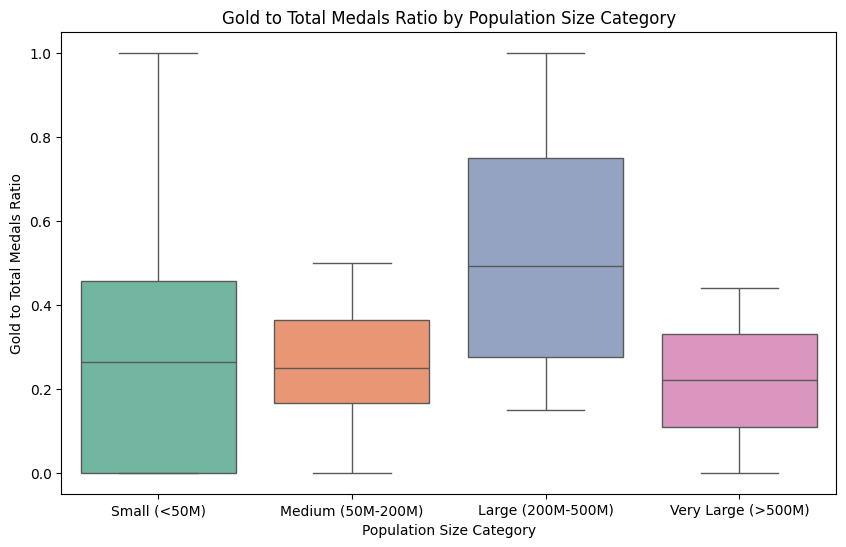

In [22]:
data['gold_to_total_ratio'] = data['gold'] / data['total']

# Categorize countries based on population sizes
bins = [0, 50, 200, 500, 1500]  
labels = ['Small (<50M)', 'Medium (50M-200M)', 'Large (200M-500M)', 'Very Large (>500M)']
data['population_category'] = pd.cut(data['population'], bins=bins, labels=labels)

# Plotting the ratio of gold to total medals for different population categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='population_category', y='gold_to_total_ratio', data=data, palette='Set2')
plt.title('Gold to Total Medals Ratio by Population Size Category')
plt.xlabel('Population Size Category')
plt.ylabel('Gold to Total Medals Ratio')
plt.show()


## Analysis: Gold to Total Medals Ratio by Population Size

### Objective:
We aim to explore how the ratio of gold medals to total medals varies across countries with different population sizes. This will help us understand if population size influences a country's ability to win a higher proportion of gold medals.

### Steps:
1. **Calculate the Ratio of Gold to Total Medals**: 
   We compute the ratio for each country

  
3. **Categorize Countries by Population**:
   To understand the relationship with population size, we divide the countries into four categories based on their population (in millions):
   - Small: Population < 50 million
   - Medium: Population between 50M and 200M
   - Large: Population between 200M and 500M
   - Very Large: Population > 500 million

4. **Visualize the Results**:
   We use a boxplot to visualize the distribution of the gold-to-total medals ratio across these population size categories. The plot will help reveal any trends or patterns.
   

## Relationship between Population, GDP, and Total Medals Won

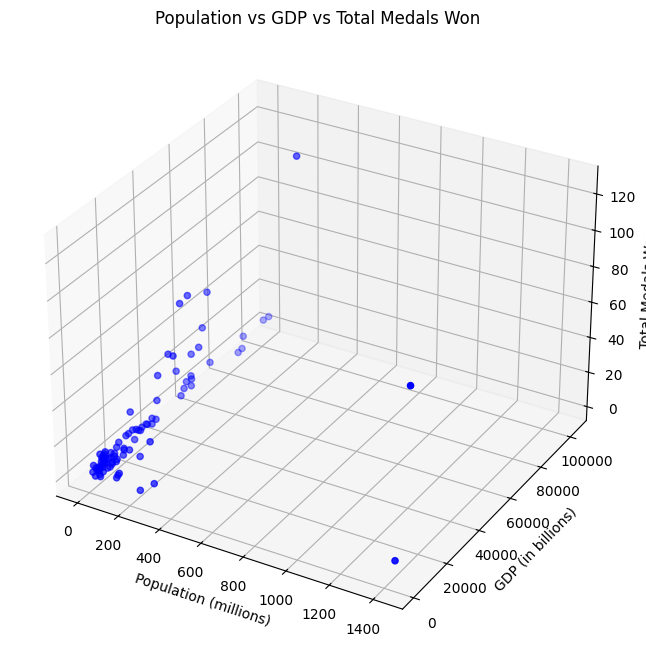

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(data['population'], data['gdp'], data['total'], c='b', marker='o')

# Labels
ax.set_xlabel('Population (millions)')
ax.set_ylabel('GDP (in billions)')
ax.set_zlabel('Total Medals Won')

plt.title('Population vs GDP vs Total Medals Won')
plt.show()


This plot helps in understanding how population size and economic power (GDP) may influence a country's success in the Olympics, as indicated by the total number of medals won. A higher concentration of points at specific regions may reveal if larger or wealthier countries tend to win more medals.

This 3D scatter plot shows the correlation between a country's population, GDP, and total Olympic medals won. It highlights potential trends where larger or wealthier nations may win more medals due to resources or population size advantages.

## Exploring Gold Medals based on GDP and Population

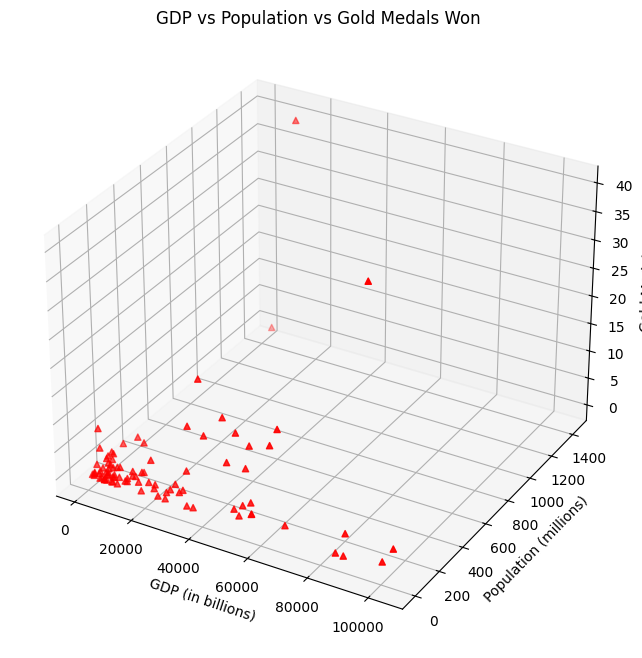

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(data['gdp'], data['population'], data['gold'], c='r', marker='^')

# Labels
ax.set_xlabel('GDP (in billions)')
ax.set_ylabel('Population (millions)')
ax.set_zlabel('Gold Medals')

plt.title('GDP vs Population vs Gold Medals Won')
plt.show()

This visualization allows us to examine if there is any specific pattern where economically stronger or more populous nations secure a higher number of gold medals. It might highlight the dominance of countries with higher GDP or population in securing top medals.

The plot provides insights into how economic strength (GDP) and population size impact a country’s performance in winning gold medals. The distribution of points might reveal dominance by richer or more populous nations.

##  Comparison of Medal Types with GDP and Population

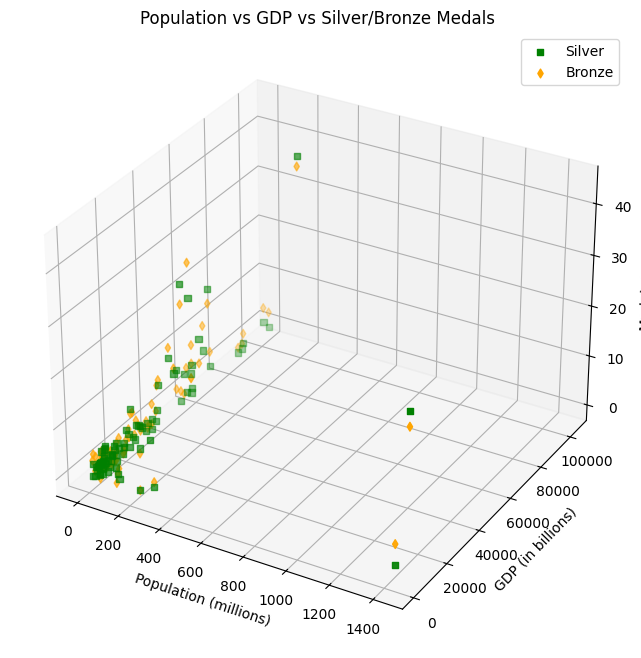

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot for silver medals
ax.scatter(data['population'], data['gdp'], data['silver'], c='g', marker='s', label='Silver')

# 3D scatter plot for bronze medals
ax.scatter(data['population'], data['gdp'], data['bronze'], c='orange', marker='d', label='Bronze')

# Labels
ax.set_xlabel('Population (millions)')
ax.set_ylabel('GDP (in billions)')
ax.set_zlabel('Medals Won')

plt.title('Population vs GDP vs Silver/Bronze Medals')
plt.legend()
plt.show()


This plot offers a comparison between the number of silver and bronze medals with respect to population and GDP. It helps in exploring whether smaller or larger countries show a particular trend in winning second or third place medals.

By comparing silver and bronze medals against GDP and population, this plot allows for understanding patterns in second and third place finishes. It shows how countries of various economic and demographic scales perform in these categories.

## How does the distribution of gold, silver, and bronze medals vary with GDP and population across countries?

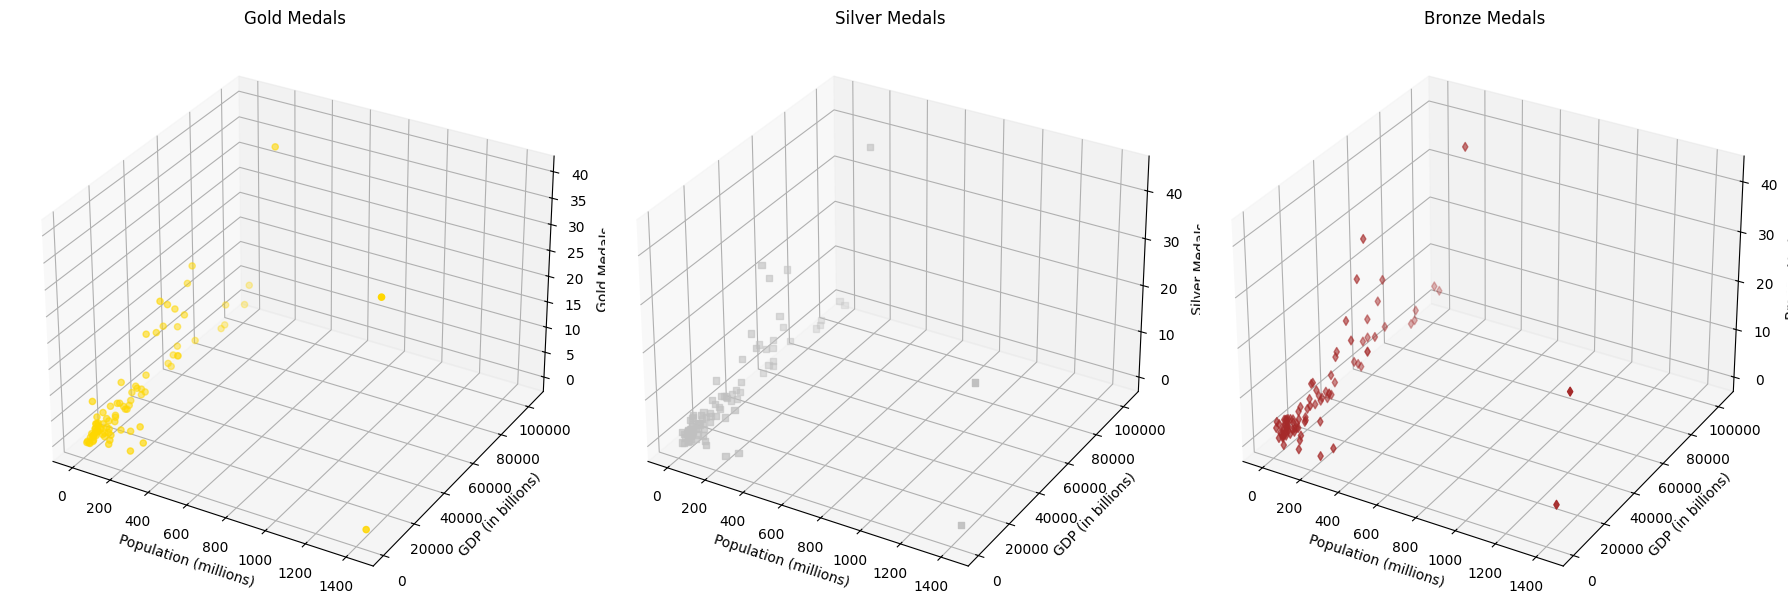

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 6))

# Plot for Gold Medals
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(data['population'], data['gdp'], data['gold'], c='gold', marker='o')
ax1.set_title('Gold Medals')
ax1.set_xlabel('Population (millions)')
ax1.set_ylabel('GDP (in billions)')
ax1.set_zlabel('Gold Medals')

# Plot for Silver Medals
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(data['population'], data['gdp'], data['silver'], c='silver', marker='s')
ax2.set_title('Silver Medals')
ax2.set_xlabel('Population (millions)')
ax2.set_ylabel('GDP (in billions)')
ax2.set_zlabel('Silver Medals')

# Plot for Bronze Medals
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(data['population'], data['gdp'], data['bronze'], c='brown', marker='d')
ax3.set_title('Bronze Medals')
ax3.set_xlabel('Population (millions)')
ax3.set_ylabel('GDP (in billions)')
ax3.set_zlabel('Bronze Medals')

plt.tight_layout()
plt.show()


**Medal Distribution with GDP and Population**
This set of 3D scatter plots shows how the distribution of gold, silver, and bronze medals varies across countries with different GDPs and populations. It allows us to compare the influence of economic and demographic factors on winning different types of Olympic medals. Each graph focuses on one medal type, providing clear insights into trends for each medal category.

- **Gold Medals:** We observe whether countries with higher GDP or population are more successful in securing top positions (gold medals).
- **Silver Medals:** This plot shows how second-place finishes correlate with economic and demographic factors.
- **Bronze Medals:** Similarly, this graph highlights the patterns in third-place finishes, offering a complete view of medal distribution dynamics.

In [42]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Define the independent variable (X) and dependent variable (Y)
X = tips[['total_bill']]
y = tips['tip']

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the data
model.fit(X, y)

# Get the coefficients (slope) and intercept of the model
slope = model.coef_[0]
intercept = model.intercept_
score = model.score(X, y)

slope, intercept, score

(0.10502451738435337, 0.9202696135546731, 0.45661658635167657)